In [2]:
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.models import model_from_json # for model saving
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


matrix([[0, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

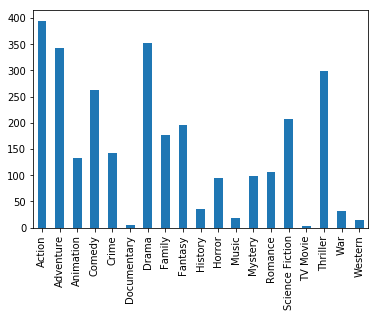

In [6]:
genres_df=pd.read_csv('data/genres.csv').set_index("movie")

poster_ids = []
poster_data = []
posters_dir = 'posters/'
dim= (224,224)
channels=3

for movie, row in genres_df.iterrows():
    img_path = '{}/{}.jpg'.format(posters_dir, movie)
    img = image.load_img(img_path, target_size=dim, color_mode='rgb')
    x = image.img_to_array(img)
    poster_data.append(x)
    poster_ids.append(movie)

poster_data = np.array(poster_data)


genres_df=pd.read_csv('data/genres.csv').set_index("movie")
genres_df.sum().plot.bar()

#remove underrepresented genres
genres_df=genres_df.drop(columns=['Documentary', 'TV Movie', 'Music','Western'])
genres_mat = np.matrix(genres_df.reset_index(drop=True))
genres_df.head()
genres_mat

In [19]:
poster_data.shape
genres_mat.shape

(1029, 15)

In [7]:
input_shape=(224,224,3)
num_classes=len(genres_df.columns)
genres=np.array(genres_mat)


In [75]:
from keras import optimizers
from keras.layers import Dropout

relu_leak = 0.3


##Custom CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=input_shape))
model.add(LeakyReLU(alpha=relu_leak))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (5, 5)))
model.add(LeakyReLU(alpha=relu_leak))
model.add(MaxPooling2D(pool_size=(2, 2)))
Dropout(0.5)
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=relu_leak))
Dropout(0.5)
model.add(Dense(num_classes, activation='sigmoid'))
opt = optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='binary_crossentropy',
              optimizer=opt,metrics=['accuracy'])



In [76]:
x=poster_data
y=genres
model.fit(x[:771],y[:771],epochs=10,batch_size=32,verbose=1)

Epoch 1/10
771/771 [==============================] - 99s 128ms/step - loss: 3.7847 - acc: 0.7620
Epoch 2/10
771/771 [==============================] - 93s 121ms/step - loss: 3.6085 - acc: 0.7752
Epoch 3/10
771/771 [==============================] - 105s 136ms/step - loss: 3.6085 - acc: 0.7752
Epoch 4/10
771/771 [==============================] - 101s 130ms/step - loss: 3.6085 - acc: 0.7752
Epoch 5/10
771/771 [==============================] - 140s 182ms/step - loss: 3.6085 - acc: 0.7752
Epoch 6/10
771/771 [==============================] - 114s 148ms/step - loss: 3.6085 - acc: 0.7752
Epoch 7/10
771/771 [==============================] - 137s 178ms/step - loss: 3.6085 - acc: 0.7752
Epoch 8/10
771/771 [==============================] - 103s 133ms/step - loss: 3.6085 - acc: 0.7752
Epoch 9/10
771/771 [==============================] - 87s 113ms/step - loss: 3.6085 - acc: 0.7752
Epoch 10/10
771/771 [==============================] - 86s 112ms/step - loss: 3.6085 - acc: 0.7752


In [77]:
genres_pred=model.predict(x[771:])
genres_test=y[771:]

In [78]:
def get_accuracy(genres_pred,genres_test,k):
    i=0
    correct=0

    for prediction in genres_pred:
        film=genres_test[i]
        predictions=prediction.argsort()[-k:][::-1]
        for genre in predictions:
            if(film[genre]==1):
                correct=correct+1
                break
        i=i+1
    return(correct/(len(genres_test)))

In [79]:
for k in [1,2,3]:
    print("Accuracy with top",k,"predictions",round(get_accuracy(genres_pred,genres_test,k)*100,2))

Accuracy with top 1 predictions 33.72
Accuracy with top 2 predictions 51.94
Accuracy with top 3 predictions 52.71


In [85]:
import pydot

In [88]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 220, 220, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 106, 106, 32)      25632     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 106, 106, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 53, 53, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 89888)             0         
__________